# Project Intro
虚拟触摸屏投射出虚拟键盘，通过触点虚拟键盘，在显示屏中完成对应的操作。
- 虚拟显示屏通常会转换为一个类似梯形的投射界面；
- 将梯形界面的坐标映射回真实的屏幕；

# Pkgs

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import solve
import math

%matplotlib inline

# 屏幕建模

In [2]:
#small_screen的分辨率1270*672
small_screen=[1270,672]

## 四个角的坐标被投射到虚拟屏幕的位置

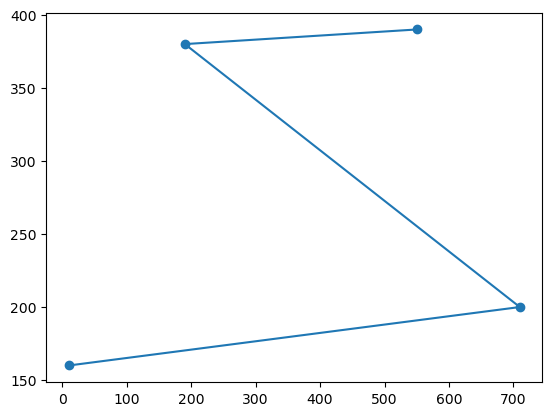

In [3]:
x = [10, 710, 190, 550]    # 实际测试得到
y = [160, 200, 380, 390]

#4个点在图中的位置

x=np.array(x)
y=np.array(y)

plt.plot(x, y, marker='o');

# 任务分解

In [4]:
# 根据平面上的两个点坐标，求解经过的直线
def line_coef(point_a, point_b):
    '''
    根据平面上的两个点坐标，求解经过的直线的解析方程系数
    
    Args:
        point_a(list) --第一个点的坐标[x, y].
        point_b(list) --第二个点的坐标[x, y].
    Returns:
        k(float) --直线斜率
        b(float) --直线截距
    '''
    # 斜率和截距
    k = (point_a[1]-point_b[1])/(point_a[0]-point_b[0])     # k = (y1-y0)/(x1-x0)
    b =point_a[1]-k*point_a[0]                              # b = y0-k*x0
    
    # 直线解析方程
#     print('直线方程为：y = {:.4}x+{:.4}'.format(k, b))
    return k, b

In [5]:
# 两条直线交点的坐标
def cross_point_line(line_a, line_b):
    k_list = [line_a[0], line_b[0]]
    b_list = [line_a[1], line_b[1]]
    
    x = (b_list[1]-b_list[0])/(k_list[0]-k_list[1])
    y = k_list[0]*x+b_list[0]
    return x, y

In [6]:
# 4个点的交叉坐标
def cross_point(x, y):
    # 定位4个点
    point_a = [x[0], y[0]]
    point_c = [x[2], y[2]]
    
    point_b = [x[1], y[1]]
    point_d = [x[3], y[3]]
    
    # 直线方程
    line_ac_k, line_ac_b = line_coef(point_a, point_c)
    line_a = [line_ac_k, line_ac_b]
    line_bd_k, line_bd_b = line_coef(point_b, point_d)
    line_b = [line_bd_k, line_bd_b]
    
    # 交叉点坐标
    corr_x, corr_y = cross_point_line(line_a, line_b)
    return corr_x, corr_y

In [7]:
# 两个点的距离
def dist_between_2_points(point_a, point_b):
    dist_squred = (point_a[0]- point_b[0])**2+(point_a[1]- point_b[1])**2
    dist = dist_squred**0.5
    return dist

## 辅助线方程

In [8]:
point_a = [10, 160]
point_c = [190, 380]

line_ac_k, line_ac_b = line_coef(point_a, point_c)

point_b = [710, 200]
point_d = [550, 390]

line_bd_k, line_bd_b = line_coef(point_b, point_d)

## 交点

In [9]:
# AC BD的焦点w
w = []
k, b = cross_point_line([line_ac_k, line_ac_b], [line_bd_k, line_bd_b])
w.append(k)
w.append(b)

print('交点坐标：', w)

交点坐标： [371.5561959654178, 601.9020172910663]


## 伸缩比例

In [14]:
def h_cross_point(touch_point, new_screen_x, new_screen_y):
    point_a = [new_screen_x[0], new_screen_y[0]]
    point_b = [new_screen_x[1], new_screen_y[1]]
    point_c = [new_screen_x[2], new_screen_y[2]]
    point_d = [new_screen_x[3], new_screen_y[3]]
    
    # 横向辅助线
    line_ab_k, line_ab_b = line_coef(point_a, point_b)
    line_ab = [line_ab_k, line_ab_b]
    line_cd_k, line_cd_b = line_coef(point_c, point_d)
    line_cd = [line_cd_k, line_cd_b]
    
    # 横向辅助点
    asisst_x, asisst_y = cross_point_line(line_ab, line_cd)
    
    # 横向交点
    x = [point_a[0], touch_point[0],  point_c[0], asisst_x]
    y = [point_a[1], touch_point[1],  point_c[1], asisst_y]
    
    cross_x, cross_y = cross_point(x, y) 
    return cross_x, cross_y

In [15]:
def v_cross_point(touch_point, new_screen_x, new_screen_y):
    point_a = [new_screen_x[0], new_screen_y[0]]
    point_b = [new_screen_x[1], new_screen_y[1]]
    point_c = [new_screen_x[2], new_screen_y[2]]
    point_d = [new_screen_x[3], new_screen_y[3]]
    
    # 纵向辅助线
    line_ac_k, line_ac_b = line_coef(point_a, point_c)
    line_ac = [line_ac_k, line_ac_b]
    line_bd_k, line_bd_b = line_coef(point_b, point_d)
    line_bd = [line_bd_k, line_bd_b]
    
    # 纵向辅助点
    asisst_x, asisst_y = cross_point_line(line_ac, line_bd)
    
    # 纵向交点
    x = [point_a[0], touch_point[0],  point_b[0], asisst_x]
    y = [point_a[1], touch_point[1],  point_b[1], asisst_y]
    
    cross_x, cross_y = cross_point(x, y) 
    return cross_x, cross_y

In [16]:
# 输出屏幕坐标
def get_screen_corr(touch_point, new_screen_x, new_screen_y, origin_screen):
    point_a = [new_screen_x[0], new_screen_y[0]]
    point_b = [new_screen_x[1], new_screen_y[1]]
    point_c = [new_screen_x[2], new_screen_y[2]]
    point_d = [new_screen_x[3], new_screen_y[3]]
    
    # 横向交叉点
    h_point_x, h_point_y = h_cross_point(touch_point, new_screen_x, new_screen_y)
    h_point = [h_point_x, h_point_y]
    print("横向拓展交点的坐标：", h_point)
    # 横向缩放比例
    ac_dist = dist_between_2_points(point_a, point_c)
    h_dist = dist_between_2_points(point_a, h_point)
    h_ratio = h_dist/ac_dist
    print("宽边转换比：",h_ratio)
    
    # 纵向交叉点
    v_point_x, v_point_y = v_cross_point(touch_point, new_screen_x, new_screen_y)
    v_point = [v_point_x, v_point_y]
    print("纵向拓展交点的坐标：", v_point)
    # 纵向缩放比例
    ab_dist = dist_between_2_points(point_a, point_b)
    v_dist = dist_between_2_points(point_a, v_point)
    v_ratio = v_dist/ab_dist
    print("长边转换比：",v_ratio)
    
    # 屏幕映射
    
    print("屏幕分辨率:", origin_screen)
    x = origin_screen[0]*v_ratio
    y = origin_screen[1]*h_ratio
    print("目标点坐标：", round(x, 2), round(y, 2))
    return x, y

# 输入虚拟屏幕坐标投射

In [17]:
#touch点
touch_point = [180,370]

new_screen_x = [10, 710, 190, 550]    # 实际测试得到
new_screen_y = [160, 200, 380, 390]

origin_screen = [1270,672]            # 屏幕分辨率

get_screen_corr(touch_point, new_screen_x, new_screen_y, origin_screen)

横向拓展交点的坐标： [181.86258499570621, 370.0542705503076]
宽边转换比： 0.9547921388650346
纵向拓展交点的坐标： [6.363717668277766, 159.79221243818728]
长边转换比： 0.005194689045317479
屏幕分辨率: [1270, 672]
目标点坐标： 6.6 641.62


(6.597255087553198, 641.6203173173033)